# DB-Scan Live Visualization of random 2D data points in Python
1. Can be visualized while running the notebook
2. Only output of final frame of visualization is shown here.

In [1]:
from IPython.display import display, clear_output
import matplotlib.pyplot as plt
import random

A distance function to return the Euclidean distance between two points

In [2]:
def distance(p, k):
    global arr
    i, temp = 0 , 0
    for i in range(no_attr):
        temp+= pow((arr[p][i]-arr[k][i]), 2)
    temp=pow(temp, 0.5)
    return temp

A function to find the neighbours of a point based on two parameters:
 1. The epsilon
 2. The number of min points

In [3]:
def findNeighbour(point):
    global nb_count
    global neighbour
    global visited
    global cluster
    global eps
    i, j, dist, count = 0,0,0,0
    for i in range(no_points):
        if(i!=point):
            dist=distance(point, i)
            if(dist<=eps):
                    neighbour.append(i)
                    nb_count += 1

For each point we are checking each of its neighbours' possible neighbours

In [4]:
def expandCluster(cluster_id, point):
    global nb_count
    global neighbour
    global visited
    global cluster
    global eps
    #print('expandCluster',nb_count)
    i, current = 0, 0
    count = nb_count
    cluster[point]=cluster_id
    for i in range(nb_count):
        current = neighbour[i]
        if(visited[current]==0):
            visited[current]=1
            findNeighbour(current)
            if((nb_count-count)<3):
                nb_count=count
        if(cluster[current]==0):
            cluster[current]=cluster_id

The main algorithm where we visit each point once and call the above functions

In [5]:
def dbScan():
    global nb_count
    global neighbour
    global visited
    global cluster
    global x
    global y
    global ClusterList
    global eps
    #scatter = ax.scatter(x,y,c=ClusterList,s=50)
    #plt.pause(1)
    cluster_id = 1
    i = j = k = 0
    for i in range(no_points):
        neighbour.clear()
        clear_output(wait = True)
        fig = plt.figure()
        plt.scatter(x,y,c=ClusterList,s=10)
        plt.show()
        plt.pause(0.001)
        #print('i',i)
        nb_count = 0
        if(visited[i]!=1):
            visited[i]=1
            #print('dbscan',nb_count)
            findNeighbour(i)
        if(nb_count>c):
            expandCluster(cluster_id, i)
            cluster_id+=1
        for i in range(no_points):
            #print('Point ', i, cluster[i])
            ClusterList[i] = cluster[i]
        #print(ClusterList)
            

Trying on a sample of 14 random data points.

In [6]:
arr_o = [[0,100],[0 ,200],[0 ,275],[100 , 150],[200 , 100],[250 , 200],[0 ,300],[100 ,200],[600 ,700],[650 ,700],
       [675 ,700],[675 ,710],[675 ,720],[50 ,400]]
arr = arr_o

In [7]:
no_points = len(arr)
eps = 100
c = 3
no_attr = 2
neighbour = []
visited = [0]*no_points
cluster = [0]*no_points
nb_count = 0
ClusterList = [-1]*no_points
x = [item[0] for item in arr]
y = [item[1] for item in arr]

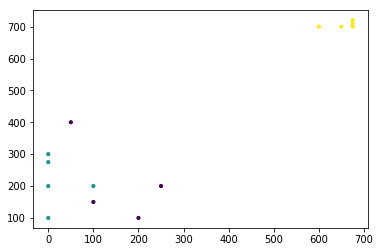

In [8]:
dbScan()

In [9]:
maxi = 0
for i in ClusterList:
    if i > maxi:
        maxi = i
print('No of clusters formed:',maxi)

No of clusters formed: 2


In [10]:
for i in range(len(ClusterList)):
    print('Point '+str(i+1)+':'+str(cluster[i]))

Point 1:1
Point 2:1
Point 3:1
Point 4:0
Point 5:0
Point 6:0
Point 7:1
Point 8:1
Point 9:2
Point 10:2
Point 11:2
Point 12:2
Point 13:2
Point 14:0


Trying on 500 random data points.

In [11]:
arr_new = random.sample([[x, y] for x in range(1,1000) for y in range(1001)],500)
arr = arr_o + arr_new

In [12]:
no_points = len(arr)
eps = 100
c = 3
no_attr = 2
neighbour = []
visited = [0]*no_points
cluster = [0]*no_points
nb_count = 0
ClusterList = [-1]*no_points
x = [item[0] for item in arr]
y = [item[1] for item in arr]

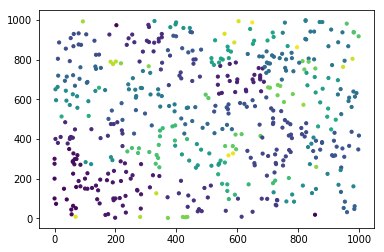

In [13]:
dbScan()

In [14]:
maxi = 0
for i in ClusterList:
    if i > maxi:
        maxi = i
print('No of clusters formed:',maxi)

No of clusters formed: 65
